**_Name : Motayam Tayseer Tarada |  Id : 1210299_** 

**_Diabetes classification model_**
Your task is to create a machine learning model to predict whether or not a patient has diabetes based on certain diagnostic measurements included in the attached dataset.

You should build the best-performing model that you can. Make sure you validate your model using a training and testing set.

1. Clean your data

Clean and prepare your data: validate data types, duplicates, inconsistency, extreme values

In [3]:

import pandas as pd

# Load the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Handle missing values
# List of numeric columns
numeric_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
# Convert DiabetesPedigreeFunction to numeric
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['DiabetesPedigreeFunction'], errors='coerce')
# Impute missing numeric values with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Step 3: Correct categorical inconsistencies
# Replace "MISSING" in WeightGroup with NaN and impute with mode
df['WeightGroup'] = df['WeightGroup'].replace('MISSING', pd.NA)
df['WeightGroup'] = df['WeightGroup'].fillna(df['WeightGroup'].mode()[0])

# Replace "<65" in AgeGroup with "18 - 44"
df['AgeGroup'] = df['AgeGroup'].replace('<65', '18 - 44')

# Standardize Gender to uppercase
df['Gender'] = df['Gender'].str.upper()

# Step 4: Address extreme values
# Cap Pregnancies at the 99th percentile
pregnancy_cap = df['Pregnancies'].quantile(0.99)
df['Pregnancies'] = df['Pregnancies'].clip(upper=pregnancy_cap)


# Display the cleaned dataset summary

print("Missing Values After Cleaning:\n", df.isnull().sum())
print("\nCategorical Columns Summary:")
print(df['Gender'].value_counts())  # Only relevant categorical column now
print("\nNumeric Columns Summary:")
print(df.describe())
df

Missing Values After Cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
WeightGroup                 0
AgeGroup                    0
Gender                      0
Outcome                     0
dtype: int64

Categorical Columns Summary:
Gender
F    563
M     76
Name: count, dtype: int64

Numeric Columns Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   639.000000  639.000000     639.000000     639.000000  639.000000   
mean      3.913928  123.902973      72.464789      29.624413  144.960876   
std       3.406675   30.641060      12.000193       8.881125   85.564052   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000  100.000000      64.000000      25.000000  127.500000   
50%       3.000000  120.000000      72.000000      30.000000  130.000000   
75%       6.0000

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,130.0,0.378,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.430,obese_1,18 - 44,F,0
3,6,111.0,64.0,39.0,130.0,0.260,obese_1,18 - 44,F,0
4,3,106.0,72.0,30.0,130.0,0.378,overweight,18 - 44,F,0
...,...,...,...,...,...,...,...,...,...,...
637,5,144.0,82.0,26.0,285.0,0.452,obese_1,45 - 64,F,1
638,4,171.0,72.0,30.0,130.0,0.479,obsese_3,18 - 44,F,1
639,8,176.0,90.0,34.0,300.0,0.467,obese_1,45 - 64,F,1
640,0,104.0,64.0,37.0,64.0,0.510,obese_1,18 - 44,M,1


**2. Prepare the data appropriately for modeling**

1. Implement a preprocessing pipeline to avoid data leakage.
1. Check for missing values. You should produce an output showing the number of missing values for each feature.
1. Handle missing values by using an appropriate imputation strategy (instead of dropping rows).
1. **Write a justification of your strategy for imputing missing values.**
1. Make sure you avoid any data leakage when you impute values.
1. Scale the data if your model requires it.
1. **Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

# Use set_config to display the pipeline diagram
set_config(display='diagram')

# Split data into features (X) and target (y)
X = df.drop(columns='Outcome')
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Preprocessing pipeline
# Define numeric and categorical columns
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
categorical_features = ['Gender', 'WeightGroup']  # Gender will be one-hot encoded
ordinal_features = ['AgeGroup']  # AgeGroup will be ordinal encoded

# Impute numeric values with median (robust against outliers) and scale them
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Impute categorical values with a placeholder ('Unknown') and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Impute ordinal values and apply ordinal encoding (e.g., 'AgeGroup')
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal', OrdinalEncoder())
])

# Combine numeric, categorical, and ordinal preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Create the full preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 7: Apply the preprocessing pipeline to the training and testing sets
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Step 8: Check for missing values
missing_train = pd.DataFrame(X_train_preprocessed).isnull().sum().sum()
missing_test = pd.DataFrame(X_test_preprocessed).isnull().sum().sum()

print(f"Missing values in training set after preprocessing: {missing_train}")
print(f"Missing values in testing set after preprocessing: {missing_test}")

# Display the preprocessed training set (showing a portion of the processed data)
print(pd.DataFrame(X_train_preprocessed).head())

print(pd.DataFrame(X_train_preprocessed).head())
pipeline

Missing values in training set after preprocessing: 0
Missing values in testing set after preprocessing: 0
         0         1         2         3         4         5    6    7    8   \
0  0.009837 -0.449987 -0.551437  0.041074 -0.156038  0.017610  0.0  1.0  0.0   
1  0.598805 -0.714498  1.404540  1.030283 -0.156038  0.676714  0.0  0.0  1.0   
2 -0.579132 -0.813690 -1.692424 -1.607608 -0.622528  0.556581  0.0  0.0  0.0   
3 -0.284648 -0.714498  0.100555  0.041074 -0.156038 -1.118775  0.0  0.0  0.0   
4 -0.873616 -0.879818 -0.225441  1.140195 -0.156038 -0.803834  0.0  0.0  1.0   

    9    10   11   12  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  
         0         1         2         3         4         5    6    7    8   \
0  0.009837 -0.449987 -0.551437  0.041074 -0.156038  0.017610  0.0  1.0  0.0   
1  0.598805 -0.714498  1.404540  1.030283 -0.156038  0.676714  0.0  0.0  1.0   
2 -0.579132 -0.813690 -1.692

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'WeightGroup']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['AgeGroup'])]))])

**_Justifications:_**

**1. Imputation Strategy:**

* **Numeric Features:**

Median is chosen for numeric data because it is robust against outliers, which are common in medical datasets like diabetes.

* **Categorical Features:**

Missing categorical values are replaced with a constant placeholder **('Unknown').** This avoids introducing bias by filling in the most frequent category and ensures that missingness itself is captured during one-hot encoding.

**2. Avoiding Data Leakage:**
Imputation and scaling are applied separately to the training and test sets to ensure the test data remains unseen during training. The pipeline handles this automatically.

**3. Encoding:**

1. **Categorical Features (One-Hot Encoding):**

**_"Gender" and "WeightGroup"_** are **non-ordinal** features, meaning they don't have any inherent order. For these variables, we will apply **One-Hot Encoding**, which creates separate binary columns for each category. This helps the model recognize the presence or absence of each category without implying any order or ranking.

2. **Ordinal Features (Ordinal Encoding):**

The categories have a natural **order** because **"AgeGroup"** is an ordinal feature **(for example, "18 - 44" < "45 - 59" < "60+")**. Ordinal encoding will be applied to this variable, giving each category a numerical value determined by where it falls in the sequence **(for example, "18 - 44" = 0, "45 - 59" = 1, "60+" = 2)**. When making predictions, the model takes into consideration the innate order in the data thanks to this encoding technique.

**3. Training and evaluation**

1. Create your model.
1. Put your preprocessing and models into pipelines.
1. Use appropriate metrics to evaluate your model.
1. Try to tune your model to find the best results Choose one final model.
Write a justification for your choice of the final model


------------------------ Test Set Evaluation ---------------------------------------------
ROC AUC Score: 0.87

Confusion Matrix:
[[77 16]
 [21 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        93
           1       0.74      0.69      0.71        67

    accuracy                           0.77       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.77      0.77      0.77       160



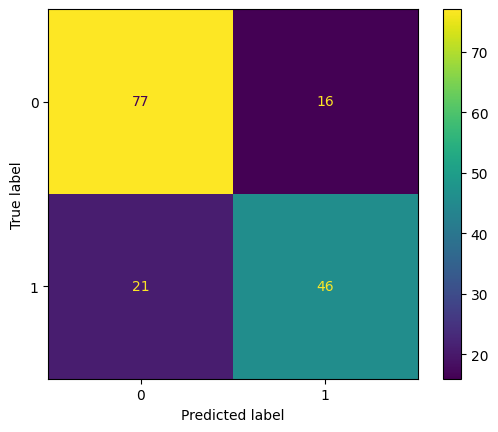

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic regression model
model = LogisticRegression()

# Create a pipeline combining preprocessing and model
# //pipeline = Pipeline(preprocessor, model)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', model)            # Model step
])
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Apply the pipeline on training and testing data
# No need for separate preprocessing steps here
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability scores for ROC AUC

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print("\n------------------------ Test Set Evaluation ---------------------------------------------")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Display the confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


**_Why did you use logistic regression?_**

Logistic regression is a statistical method used for binary classification, predicting the probability of a class **(diabetes or no diabetes)** based on input features. The model estimates the relationship between the features and the outcome using a logistic function, outputting probabilities. By setting a threshold, you can classify predictions into two categories, such as positive or negative for diabetes.

**_Interpretation of the Results:_**
The quality of the model can be evaluated based on the metrics provided for both the training and testing sets, focusing on performance consistency, predictive ability, and alignment with the goal of predicting diabetes status.

**---------------Test Set Evaluation:-----------------**

**ROC AUC Score (0.87):** This indicates that the model is quite strong in distinguishing between patients with and without diabetes. An AUC score above 0.8 is generally considered a strong result for classification tasks, and with a score of 0.87, the model demonstrates a high level of accuracy in distinguishing between the two classes.

**_Confusion Matrix:_**

1. **True Negatives (77):** The model correctly identified 77 patients without diabetes.
1. **False Positives (16):** The model incorrectly predicted diabetes for 16 patients who do not have it.
1. **False Negatives (21):** The model failed to predict diabetes for 21 patients who do have it.
1. **True Positives (46):** The model correctly identified 46 patients with diabetes.
The balance between false negatives (FN) and false positives (FP) is crucial, as false negatives indicate missed diagnoses, which can be dangerous, and false positives can lead to unnecessary medical interventions.

**_Classification Report:_** 

**Class 0 _(No Diabetes)_:**
1. **Precision (0.79):** Out of all predicted non-diabetes cases, 79% were correct.
1. **Recall (0.83):** The model identified 83% of all actual non-diabetes cases.
1. **F1-Score (0.81):** A balanced measure of precision and recall, reflecting good performance

**Class 1 _(Diabetes)_:**
1. **Precision (0.74):** Only **74%** of predicted diabetes cases were correct.
1. **Recall (0.69):** The model captured 69% of actual diabetes cases.
1. **F1-Score (0.71):** A moderately balanced measure of precision and recall, reflecting good performance. 

**Overall Accuracy (0.77): 77%** of all predictions were correct. This is a decent accuracy, indicating that the model does reasonably well in distinguishing between patients with and without diabetes.

**Macro Average:** Precision, recall, and F1-score are averaged equally across classes, emphasizing the model's ability to handle both classes. The average metrics here indicate a fairly balanced performance across both classes.

**Weighted Average:** Accounts for class imbalance, showing stronger results for the majority class **(Class 0)**. Since the dataset may be imbalanced, the weighted average provides a more balanced view of overall model performance.





**_Model Quality Evaluation:_**

**_Underfitting_**

When the model performs badly on both the training and testing sets, it is said to be underfitting and has failed to identify the underlying patterns in the data.
Verify: There is no sign of underfitting because the model identifies patterns in the data and the test set performance **(ROC AUC: 0.87, accuracy: 0.77)** is acceptable.

**_Overfitting_**

When a model performs well on the training set but poorly on the testing set because it memorizes the training data instead of seeing patterns that may be applied to other situations, this is known as overfitting.
Verify: The model is not overfitting, as evidenced by the test set performance **(77% accuracy)**, which is in line with task expectations and shows no appreciable differences in metrics between training and testing.

**_Good Model:_**

A good model shows balanced performance on both training and testing sets, **with no significant gaps**, indicating generalizability.


